In [94]:

#-->Can you build a machine learning model to accurately predict whether or not the patients 
## in the dataset have diabetes or not?

##-->The datasets consist of several medical predictor (independent) variables and 
##   one target (dependent) variable, Outcome. Independent variables include the number of pregnancies 
##   the patient has had, their BMI, insulin level, age, and so on.

##Using Naive Bayes classifier to predict the Outcome.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [96]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [97]:
pimaindf=pd.read_csv("pima-indians-diabetes.data",names=cols)

In [98]:
pimaindf.shape

(768, 9)

In [99]:
pimaindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
pimaindf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
pimaindf.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [102]:
pimadfm=pimaindf[(pimaindf.Glucose !=0) & (pimaindf.BloodPressure !=0) & (pimaindf.SkinThickness !=0) & (pimaindf.BMI!=0)] 

In [103]:
pimadfm.shape

(532, 9)

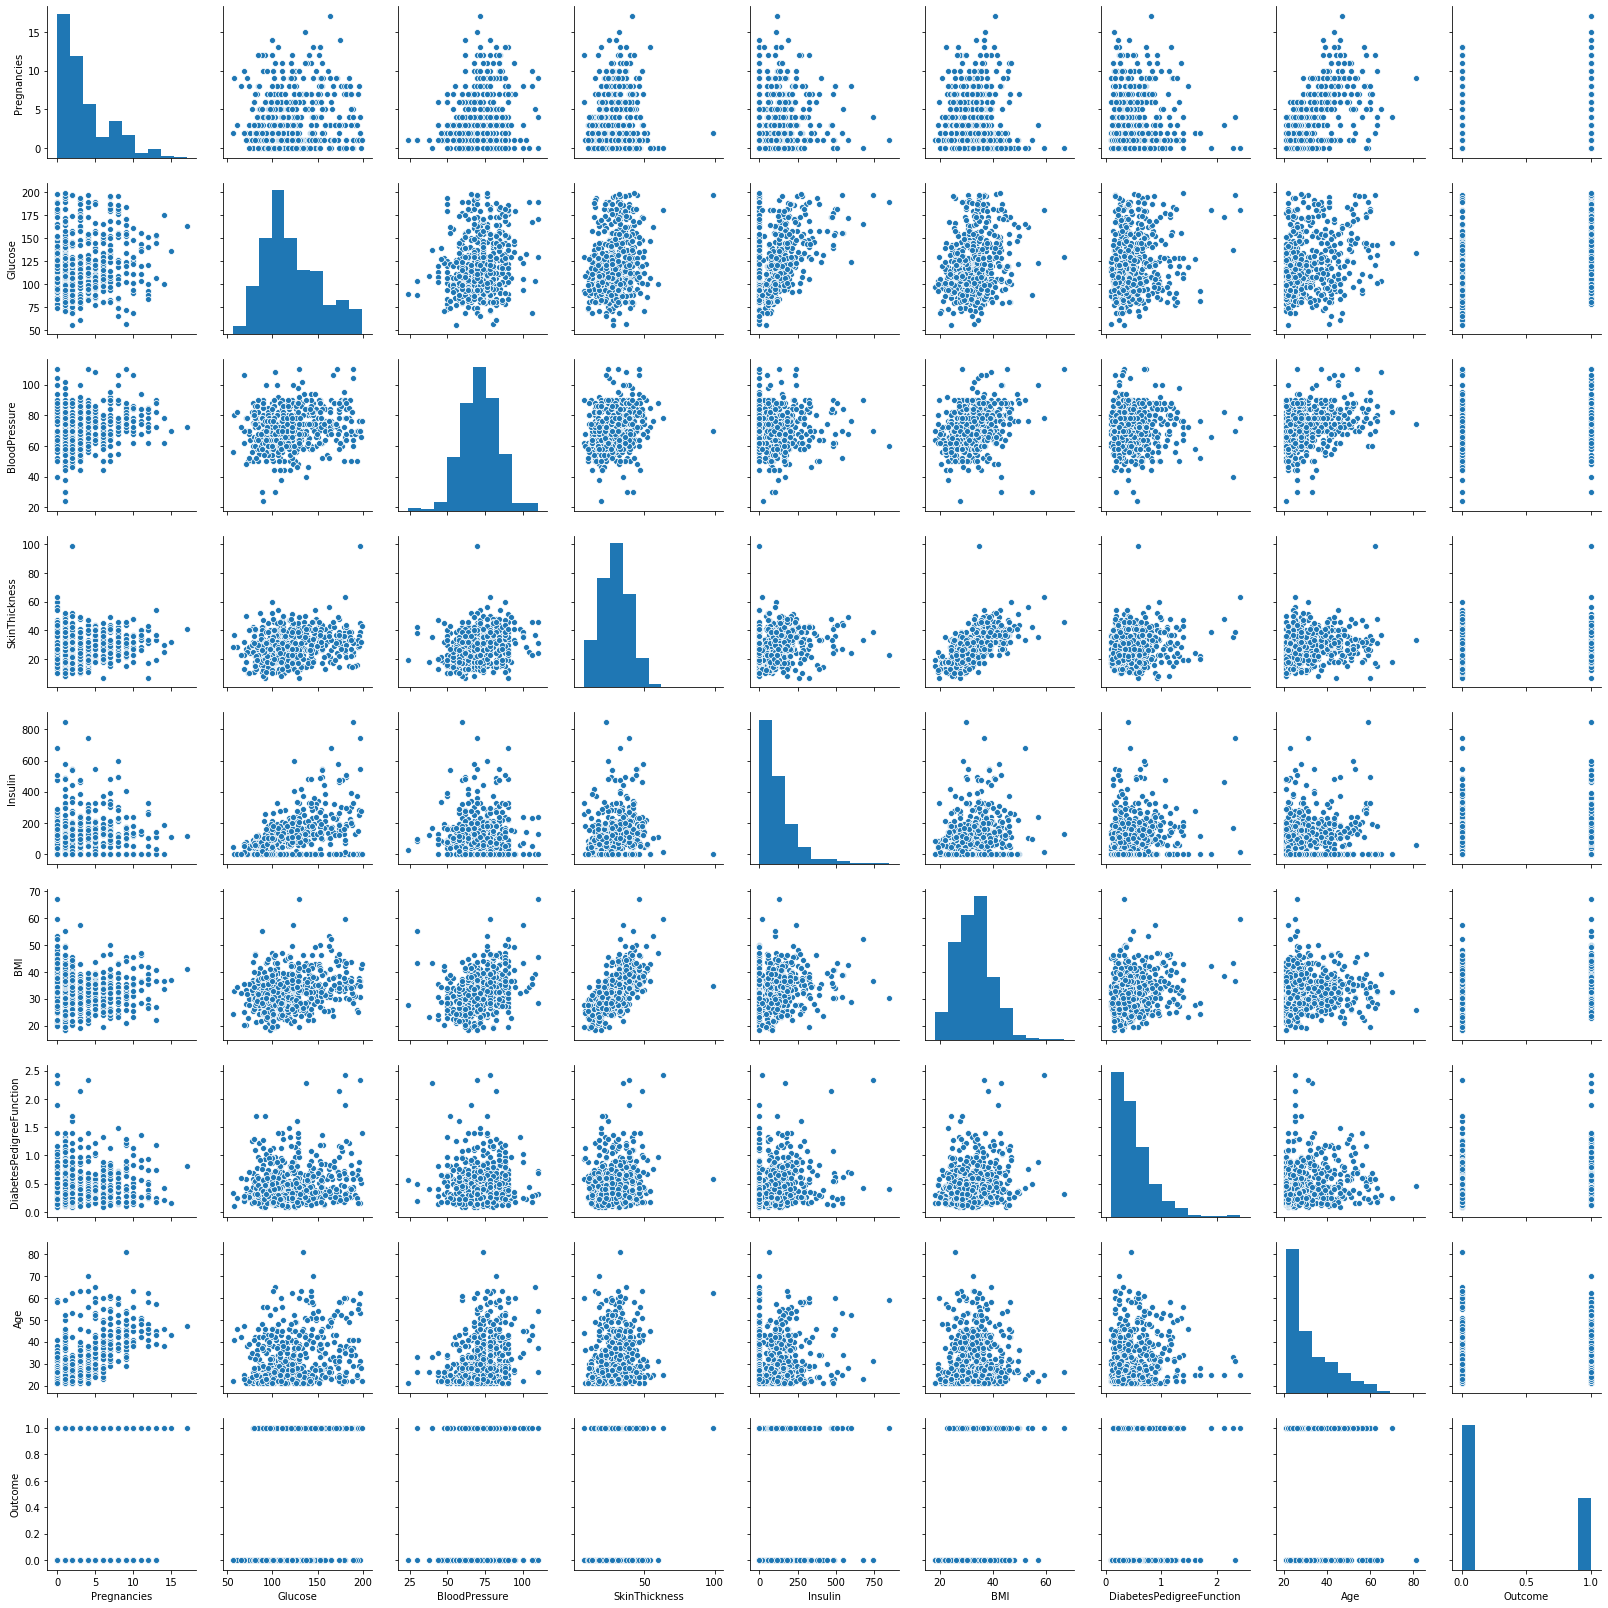

In [104]:
import seaborn as sns
sns.pairplot(pimadfm)

In [105]:
#Our Assumption is that the variable are mutually independent  in case of NB Algorithm but we can see there is relation

In [106]:
pimadfm.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125330,0.204663,0.095085,-0.006568,0.008576,0.007435,0.640747,0.252586
Glucose,0.125330,1.000000,0.219178,0.226590,0.459905,0.247079,0.165817,0.278907,0.503614
BloodPressure,0.204663,0.219178,1.000000,0.226072,0.007052,0.307357,0.008047,0.346939,0.183432
SkinThickness,0.095085,0.226590,0.226072,1.000000,0.126240,0.647422,0.118636,0.161336,0.254874
Insulin,-0.006568,0.459905,0.007052,0.126240,1.000000,0.191168,0.151531,0.081126,0.212204
BMI,0.008576,0.247079,0.307357,0.647422,0.191168,1.000000,0.151107,0.073438,0.300901
DiabetesPedigreeFunction,0.007435,0.165817,0.008047,0.118636,0.151531,0.151107,1.000000,0.071654,0.233074
Age,0.640747,0.278907,0.346939,0.161336,0.081126,0.073438,0.071654,1.000000,0.315097
Outcome,0.252586,0.503614,0.183432,0.254874,0.212204,0.300901,0.233074,0.315097,1.000000


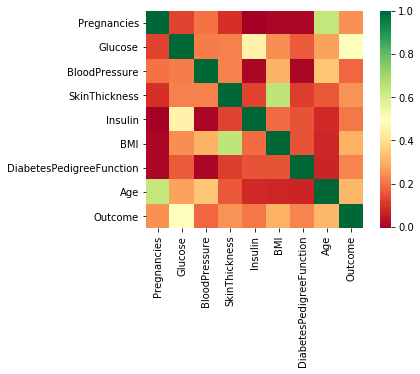

In [107]:
sns.heatmap(pimadfm.corr(), square=True, cmap='RdYlGn')

In [108]:
X=pimadfm.drop('Outcome',axis=1)
y=pimadfm['Outcome']

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

In [110]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
y_pred=model.predict(X_test)

In [112]:
model.score(X_train,y_train)

0.7580645161290323

In [113]:
model.score(X_test,y_test)

0.7875

In [114]:
from sklearn import metrics
expected=y_test
predicted=y_pred
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       106
           1       0.67      0.72      0.70        54

    accuracy                           0.79       160
   macro avg       0.76      0.77      0.77       160
weighted avg       0.79      0.79      0.79       160

[[87 19]
 [15 39]]


In [115]:
#The Model didnt perform well on the Diabetic case compare to non diabetic .
#Our assumption in the Naive Bayes is features in the Datasets are mutually independent but there are some relations.
#We need domain knowledge to handle 0 ,i have tried to remove those rows from the dataframe.
#Data for Non diabetic are more in the dataset.
#By this we can improve the performance of the model.